<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Supervised Learning Classification: Logistic Regression - Week 1</center></h1>


<center><img src="https://images.unsplash.com/photo-1604594849809-dfedbc827105?crop=entropy&cs=tinysrgb&fm=jpg&ixlib=rb-1.2.1&q=80&raw_url=true&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870" width="800" height="500"></center>

<b><h2><center>Income Group Classification Case Study</center></h2></b>

## Problem Statement


### Context 

DeltaSquare is an NGO that works with the government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are given a task of coming up with a policy framework using a dataset that the government received from WHO.

###Objective

You, as a Data Scientist at DeltaSquare, are tasked with analyzing the data provided to identify the different factors that influence the income of an individual, build a prediction model that can help the government formulate policies for the right pockets of the society, and share a proposal for the government.

### Dataset

The data contains characteristics of the people

* age: continuous - age of a Person 
* workclass: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.
* education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: no. of years a person studied - continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. of hours a person works - continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year) 

## Loading Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

<IPython.core.display.Javascript object>

## Loading data

In [2]:
who = pd.read_csv("who_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another variable to avoid any changes to original data
data = who.copy()

<IPython.core.display.Javascript object>

## Overview of the data

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,race,sex,capital gain,capital loss,working hours per week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


<IPython.core.display.Javascript object>

In [5]:
data.tail()

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,race,sex,capital gain,capital loss,working hours per week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,White,Female,15024,0,40,United-States,>50K


<IPython.core.display.Javascript object>

-  The dataset contains information about different types of people.

### Understand the shape of the dataset.

In [ ]:
data.shape

(32561, 14)

* The dataset has 32561 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education-no. of years  32561 non-null  int64 
 5   marital status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   race                    32561 non-null  object
 8   sex                     32561 non-null  object
 9   capital gain            32561 non-null  int64 
 10  capital loss            32561 non-null  int64 
 11  working hours per week  32561 non-null  int64 
 12  native-country          32561 non-null  object
 13  salary                  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


<IPython.core.display.Javascript object>

* We see that names of the columns have spaces, dots, and dash which we will remove as they should not be present in column names. We are doing this to maintain uniformity among the column names.
* Dependent variable is the salary which is of categorical type.
* age, capital gain, and capital loss are of integer type while other variables are of categorical type.
* There are no missing values in the dataset.

In [ ]:
# fixing the names of columns as there are dots, spaces  in columns names
data.columns = [col.replace(" ", "_") for col in data.columns]
data.columns = [col.replace("-", "_") for col in data.columns]
data.columns = [col.replace(".", "") for col in data.columns]
data.columns = [col.replace(" ", "") for col in data.columns]

In [ ]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'race', 'sex', 'capital_gain',
       'capital_loss', 'working_hours_per_week', 'native_country', 'salary'],
      dtype='object')


* The column names are fixed

### Checking for duplicate values

In [7]:
data.duplicated().sum()

30

<IPython.core.display.Javascript object>

- There are 30 duplicates in the dataset.

### Dropping the duplicate values

In [8]:
data = data.drop_duplicates()

<IPython.core.display.Javascript object>

In [9]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

### Checking for missing values

In [10]:
data.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education-no. of years    0
marital status            0
occupation                0
race                      0
sex                       0
capital gain              0
capital loss              0
working hours per week    0
native-country            0
salary                    0
dtype: int64

<IPython.core.display.Javascript object>

- There are no missing value in the dataset

### Statistical summary

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32531.0,38.588331,13.637685,17.0,28.0,37.0,48.0,90.0
fnlwgt,32531.0,189788.230826,105564.168325,12285.0,117815.0,178370.0,237019.0,1484705.0
education-no. of years,32531.0,10.081953,2.571842,1.0,9.0,10.0,12.0,16.0
capital gain,32531.0,1078.642649,7388.624210,0.0,0.0,0.0,0.0,99999.0
capital loss,32531.0,87.384341,403.137260,0.0,0.0,0.0,0.0,4356.0
working hours per week,32531.0,40.441025,12.347506,1.0,40.0,40.0,45.0,99.0


<IPython.core.display.Javascript object>

* `age`: Average age of people in the dataset is around 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average number of years spent in education is ~10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.

**Let us look at different levels in categorical variables**

In [12]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['workclass', 'education', 'marital status', 'occupation', 'race', 'sex',
       'native-country', 'salary'],
      dtype='object')

<IPython.core.display.Javascript object>

In [13]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in workclass are :
 Private             22667
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
**************************************************
Unique values in education are :
 HS-grad         10490
 Some-college     7280
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64
**************************************************
Unique values in marital status are :
 Married-civ-spouse       14970
 Never-married            10661
 Divorced                  4441
 Separated                 

<IPython.core.display.Javascript object>

* There are some values represented by a '?' in workclass, occupation, and native country columns which we should investigate further.
* There are many distinct values in native_country that can be reduced to their respective continents.
* The distinct levels of marital_status can also be reduced.

## Data Preprocessing

- We can assume that wherever there is a ? the data is unknown or missing
- Let us see if there is a pattern in the missingness

#### workclass

In [ ]:
data[data["workclass"] == " ?"].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
13525,19,?,112780,Some-college,10,Never-married,?,White,Female,0,0,30,United-States,<=50K
19240,69,?,337720,HS-grad,9,Married-civ-spouse,?,White,Male,0,0,24,United-States,<=50K
11234,17,?,297117,11th,7,Never-married,?,White,Female,0,0,40,United-States,<=50K
9030,77,?,185426,HS-grad,9,Married-civ-spouse,?,White,Male,0,0,15,United-States,<=50K
29956,68,?,108683,Some-college,10,Married-civ-spouse,?,White,Female,0,0,12,United-States,>50K


* From the sample it looks like wherever workclass is missing occupation is also missing. 
* It looks like for ? observations in workclass the native country is the United States.
* Let's see if the above observations hold.

In [ ]:
data[data["workclass"] == " ?"]["occupation"].value_counts()

 ?    1836
Name: occupation, dtype: int64

* It is indeed true that wherever workclass has ? the occupation is also ?
* This indicates there is a strong pattern in the missingness of workclass and occupation. This is intuitive as well because both the columns are capturing similar information.

In [ ]:
data[data["workclass"] == " ?"]["native_country"].value_counts()

 United-States         1659
 Mexico                  33
 ?                       27
 Canada                  14
 Philippines             10
 South                    9
 Germany                  9
 Taiwan                   9
 China                    7
 El-Salvador              6
 Italy                    5
 Puerto-Rico              5
 Poland                   4
 England                  4
 Portugal                 3
 Columbia                 3
 Vietnam                  3
 Dominican-Republic       3
 Japan                    3
 Cuba                     3
 Haiti                    2
 France                   2
 Ecuador                  1
 Peru                     1
 Cambodia                 1
 Thailand                 1
 Honduras                 1
 Laos                     1
 Hong                     1
 Guatemala                1
 Trinadad&Tobago          1
 Iran                     1
 Nicaragua                1
 Jamaica                  1
 Scotland                 1
Name: native_country

* The above observations don't hold for native_country as there many other countries where the observations are ?.

#### occupation

In [ ]:
data[data["occupation"] == " ?"].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
4072,34,?,146589,HS-grad,9,Never-married,?,Black,Female,0,0,40,United-States,<=50K
12405,18,?,236090,HS-grad,9,Never-married,?,White,Female,0,0,40,United-States,<=50K
30713,56,?,192325,Some-college,10,Divorced,?,White,Female,0,0,20,United-States,<=50K
5320,28,?,230704,HS-grad,9,Never-married,?,Black,Male,0,0,40,United-States,<=50K
3947,42,?,240027,HS-grad,9,Divorced,?,Black,Female,0,0,40,United-States,<=50K


In [ ]:
data[data["occupation"] == " ?"]["workclass"].value_counts()

 ?               1836
 Never-worked       7
Name: workclass, dtype: int64

* We observe the same pattern here, where occupation is ? most of the values in workclass are ?.

In [ ]:
data[data["occupation"] == " ?"]["native_country"].value_counts()

 United-States         1666
 Mexico                  33
 ?                       27
 Canada                  14
 Philippines             10
 South                    9
 Germany                  9
 Taiwan                   9
 China                    7
 El-Salvador              6
 Italy                    5
 Puerto-Rico              5
 Poland                   4
 England                  4
 Portugal                 3
 Columbia                 3
 Vietnam                  3
 Dominican-Republic       3
 Japan                    3
 Cuba                     3
 Haiti                    2
 France                   2
 Ecuador                  1
 Peru                     1
 Cambodia                 1
 Thailand                 1
 Honduras                 1
 Laos                     1
 Hong                     1
 Guatemala                1
 Trinadad&Tobago          1
 Iran                     1
 Nicaragua                1
 Jamaica                  1
 Scotland                 1
Name: native_country

* The native_country column has other countries where the observations are ? corresponding to ?s in occupation.

#### native_country

In [ ]:
data[data["native_country"] == " ?"].sample(5)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
12082,36,Private,242713,HS-grad,9,Divorced,Adm-clerical,Black,Female,0,0,40,?,<=50K
7345,20,Private,285295,Some-college,10,Never-married,Machine-op-inspct,Asian-Pac-Islander,Female,0,0,40,?,<=50K
22788,21,Private,143604,Some-college,10,Never-married,Other-service,White,Female,0,0,29,?,<=50K
31128,56,Local-gov,268213,Masters,14,Married-civ-spouse,Prof-specialty,White,Male,0,0,35,?,>50K
777,34,Private,73585,Masters,14,Married-civ-spouse,Prof-specialty,White,Male,0,0,40,?,<=50K


In [ ]:
data[data["native_country"] == " ?"]["occupation"].value_counts()

 Prof-specialty       102
 Other-service         82
 Exec-managerial       74
 Craft-repair          69
 Sales                 66
 Adm-clerical          49
 Machine-op-inspct     36
 ?                     27
 Transport-moving      25
 Handlers-cleaners     20
 Tech-support          16
 Priv-house-serv        6
 Farming-fishing        5
 Protective-serv        5
Name: occupation, dtype: int64

In [ ]:
data[data["native_country"] == " ?"]["workclass"].value_counts()

 Private             409
 Self-emp-not-inc     42
 Self-emp-inc         42
 ?                    27
 Local-gov            26
 State-gov            19
 Federal-gov          17
Name: workclass, dtype: int64

* There is no clear pattern here.

**Observations**:

* We observe that all the observations where workclass = ? the values in the occupation are ? 
* The strong pattern between workclass and occupation makes sense as both of these variables capture similar information.
* There is no strong correlation of ? observations in occupation and workclass with native_country.
* For now we will replace these ?'s with the 'unknown' category.

#### Replacing ? with 'Unknown'

In [ ]:
data.workclass = data.workclass.apply(lambda x: "Unknown" if x == " ?" else x)
data.native_country = data.native_country.apply(lambda x: "Unknown" if x == " ?" else x)
data.occupation = data.occupation.apply(lambda x: "Unknown" if x == " ?" else x)

#### Mapping countries to continents to reduce the number of unique values.

In [ ]:
data.native_country.nunique()

42

* There are 42 distinct countries in the data set, we can reduce them to their respective continents as this will help us reduce the dimension of data.

In [ ]:
data.native_country = data.native_country.str.replace(
    " ", ""
)  # remove empty spaces from strings

In [ ]:
north_america = [
    "Canada",
    "Cuba",
    "Dominican-Republic",
    "El-Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Outlying-US(Guam-USVI-etc)",
    "Puerto-Rico",
    "Trinadad&Tobago",
    "United-States",
]
asia = [
    "Cambodia",
    "China",
    "Hong",
    "India",
    "Iran",
    "Japan",
    "Laos",
    "Philippines",
    "Taiwan",
    "Thailand",
    "Vietnam",
]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = [
    "England",
    "France",
    "Germany",
    "Greece",
    "Holand-Netherlands",
    "Hungary",
    "Ireland",
    "Italy",
    "Poland",
    "Portugal",
    "Scotland",
    "Yugoslavia",
]
other = ["South", "Unknown"]

In [ ]:
def region_combining(x):
    if x in north_america:
        return "north_america"
    elif x in asia:
        return "asia"
    elif x in south_america:
        return "south_america"
    elif x in europe:
        return "europe"
    elif x in other:
        return "other"
    else:
        return x

In [ ]:
data["native_country"] = data["native_country"].apply(region_combining)

In [ ]:
print("Distinct values in Native Country column:", data.native_country.nunique())

Distinct values in Native Country column: 5


#### Reducing the number of distinct values in marital_status

In [ ]:
data.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

We can reduce these values into the following groups:
* Married
* Not-Married
* Never-Married

In [ ]:
data.marital_status = data.marital_status.str.replace(
    " ", ""
)  # remove empty spaces from strings

married = ["Married-civ-spouse", "Married-AF-spouse"]
not_married = ["Divorced", "Separated", "Widowed", "Married-spouse-absent"]


def reduce_marital_status(x):
    if x in married:
        return "married"
    elif x in not_married:
        return "not_married"
    else:
        return x

In [ ]:
data.marital_status = data.marital_status.apply(reduce_marital_status)

In [ ]:
data.marital_status.unique()

array(['Never-married', 'married', 'not_married'], dtype=object)

* Values have been clubbed into three categories.

Let us store the treated dataset into a different dataframe.

In [ ]:
df = data.copy()

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

### Observations on hours_per_week

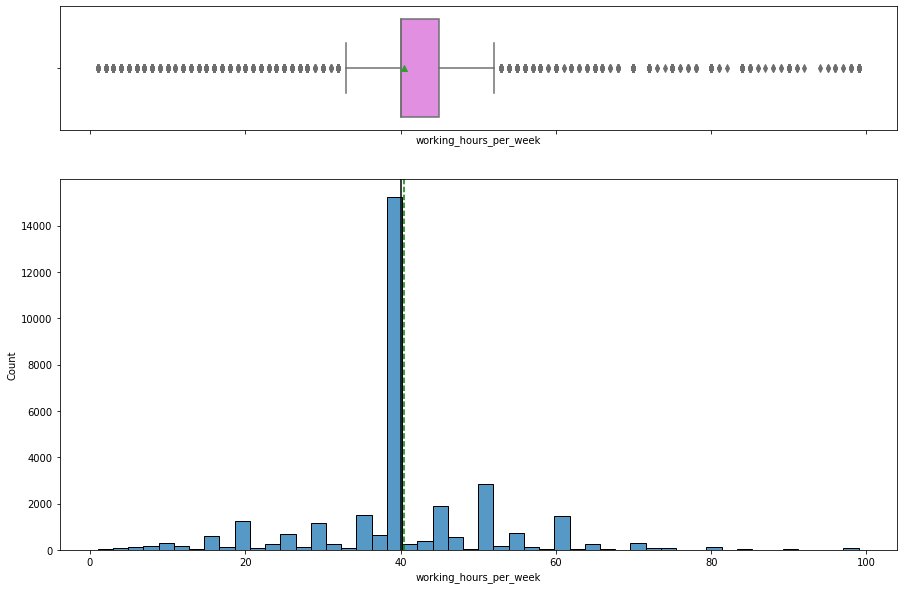

In [ ]:
histogram_boxplot(data, "working_hours_per_week", bins=50)

* Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week.
* Some of the observations are clear outliers like working  1 hour a week which needs to be treated.

### Observations on workclass

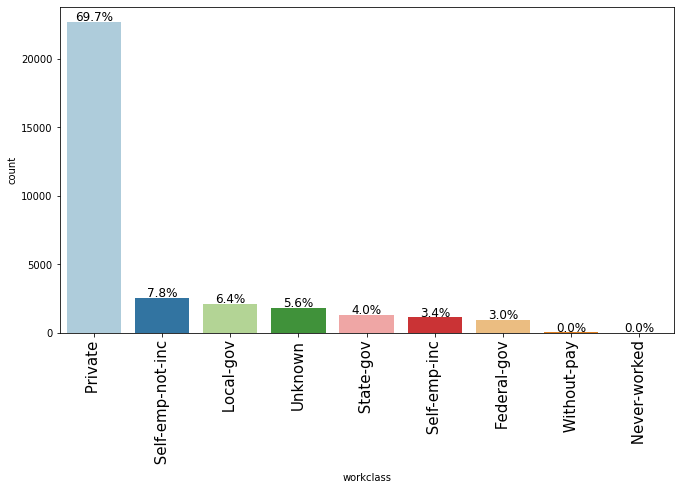

In [ ]:
labeled_barplot(data, "workclass", perc=True)

* ~70% of the observations are from the Private sector working class.
* As expected from the number of hours per week.

### Observations on native_country

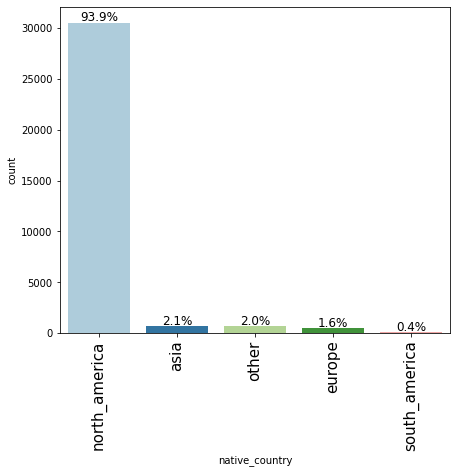

In [ ]:
labeled_barplot(data, "native_country", perc=True)

* 94% of the people are native to north_america followed by 2.1% Asians.

### Observations on salary

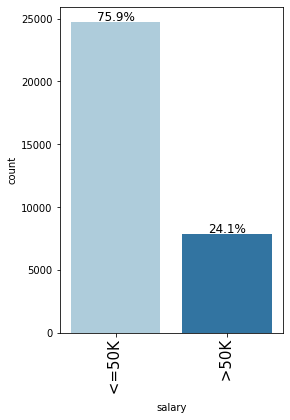

In [ ]:
labeled_barplot(data, "salary", perc=True)

* ~24% of the observations have a salary above 50K and while ~76% have a salary below 50K

### Bivariate analysis

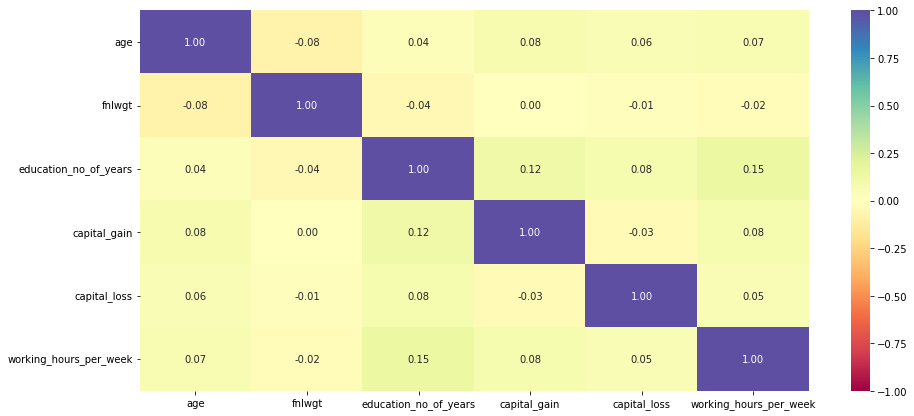

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no significant correlation between the columns.

salary    <=50K   >50K    All
sex                          
All       24692   7839  32531
 Male     15113   6660  21773
 Female    9579   1179  10758
------------------------------------------------------------------------------------------------------------------------


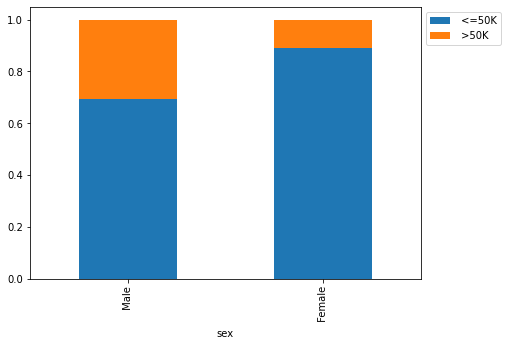

In [ ]:
stacked_barplot(data, "sex", "salary")

* ~30% of the males have salary >50K whereas only ~10% of the females have salary >50K.
* This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.

### salary vs education

salary          <=50K   >50K    All
education                          
All             24692   7839  32531
 Bachelors       3132   2221   5353
 HS-grad         8816   1674  10490
 Some-college    5894   1386   7280
 Masters          763    959   1722
 Prof-school      153    423    576
 Assoc-voc       1021    361   1382
 Doctorate        107    306    413
 Assoc-acdm       802    265   1067
 10th             871     62    933
 11th            1115     60   1175
 7th-8th          605     40    645
 12th             400     33    433
 9th              487     27    514
 5th-6th          316     16    332
 1st-4th          160      6    166
 Preschool         50      0     50
------------------------------------------------------------------------------------------------------------------------


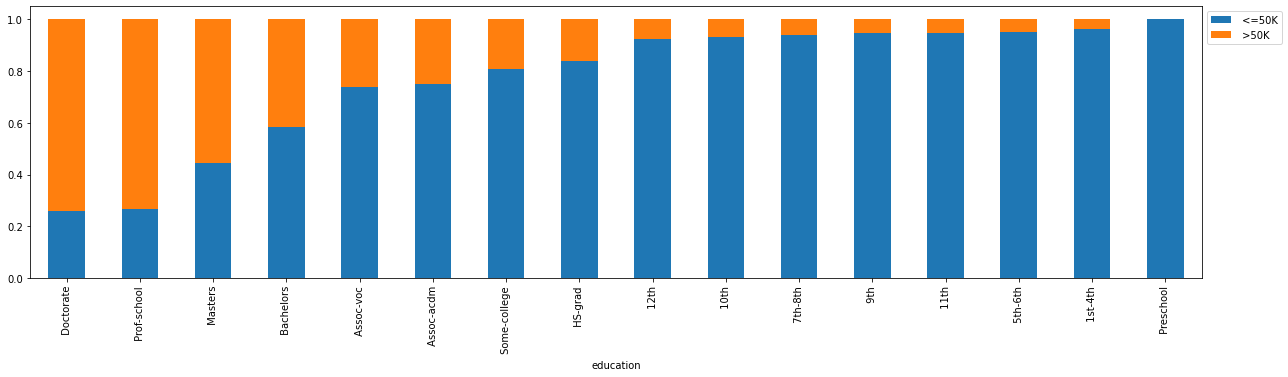

In [ ]:
stacked_barplot(data, "education", "salary")

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

### salary vs occupation

salary               <=50K   >50K    All
occupation                              
All                  24692   7839  32531
 Exec-managerial      2097   1968   4065
 Prof-specialty       2278   1858   4136
 Sales                2666    983   3649
 Craft-repair         3164    929   4093
 Adm-clerical         3259    507   3766
 Transport-moving     1277    320   1597
 Tech-support          644    283    927
 Machine-op-inspct    1750    249   1999
 Protective-serv       438    211    649
Unknown               1652    191   1843
 Other-service        3153    137   3290
 Farming-fishing       877    115    992
 Handlers-cleaners    1283     86   1369
 Armed-Forces            8      1      9
 Priv-house-serv       146      1    147
------------------------------------------------------------------------------------------------------------------------


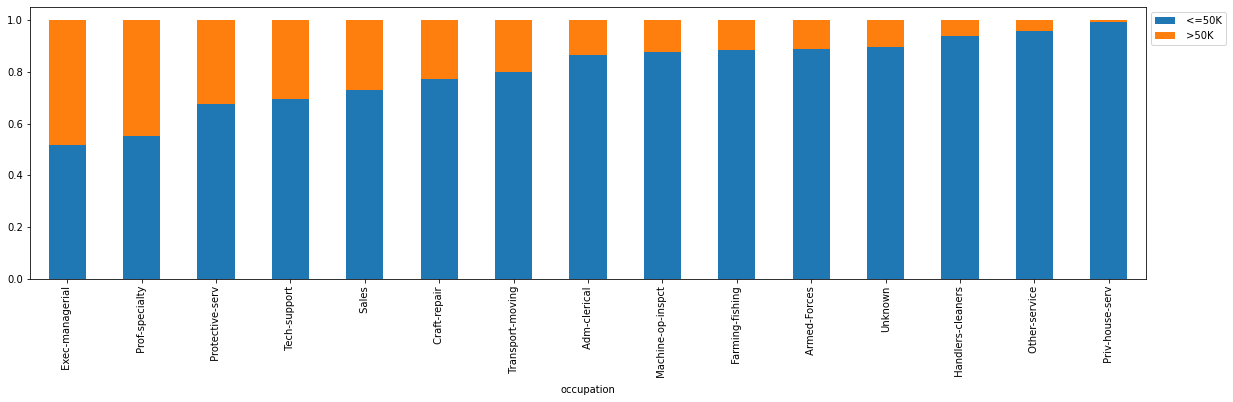

In [ ]:
stacked_barplot(data, "occupation", "salary")

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

### salary vs workclass

salary              <=50K   >50K    All
workclass                              
All                 24692   7839  32531
 Private            17706   4961  22667
 Self-emp-not-inc    1816    724   2540
 Self-emp-inc         494    622   1116
 Local-gov           1476    617   2093
 Federal-gov          589    371    960
 State-gov            945    353   1298
Unknown              1645    191   1836
 Never-worked           7      0      7
 Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


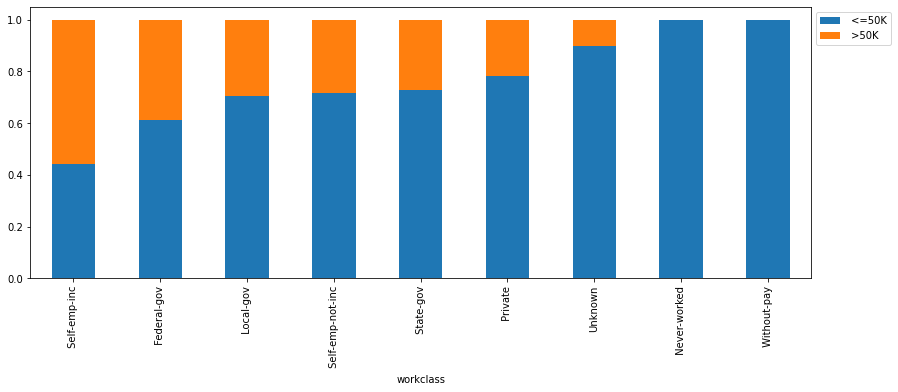

In [ ]:
stacked_barplot(data, "workclass", "salary")

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* ~20% of the people working in the private sector earn more than 50K.

### salary vs age

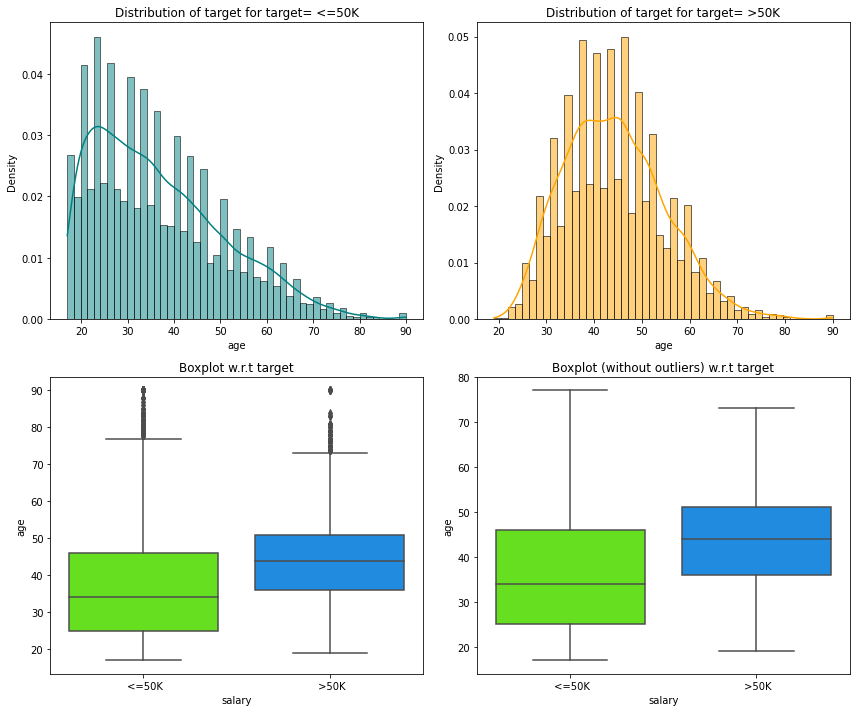

In [ ]:
distribution_plot_wrt_target(data, "age", "salary")

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

### salary vs working_hours_per_week

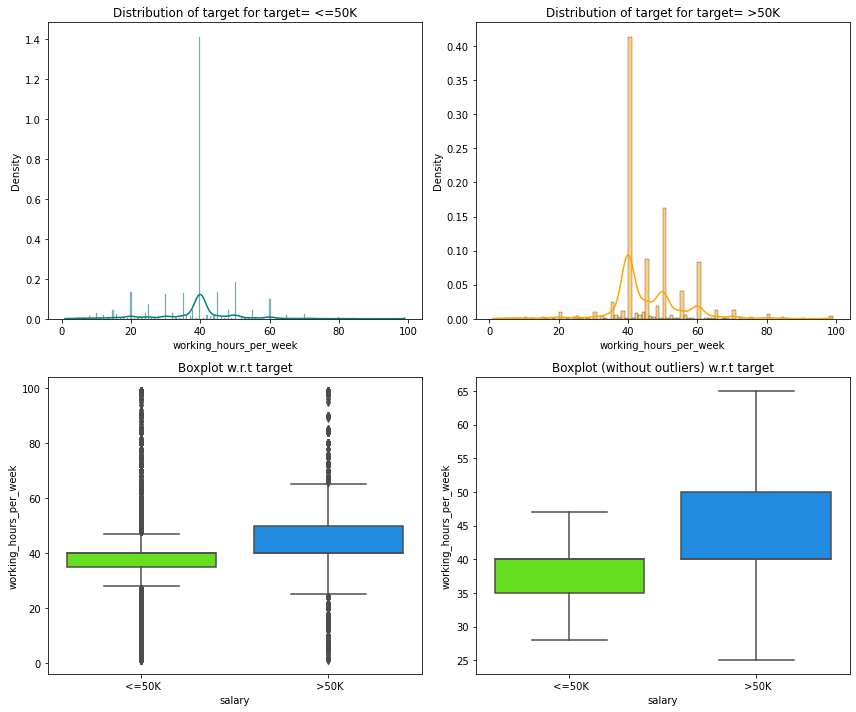

In [ ]:
distribution_plot_wrt_target(data, "working_hours_per_week", "salary")

* Majority of people having above 50K salary work around 40 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

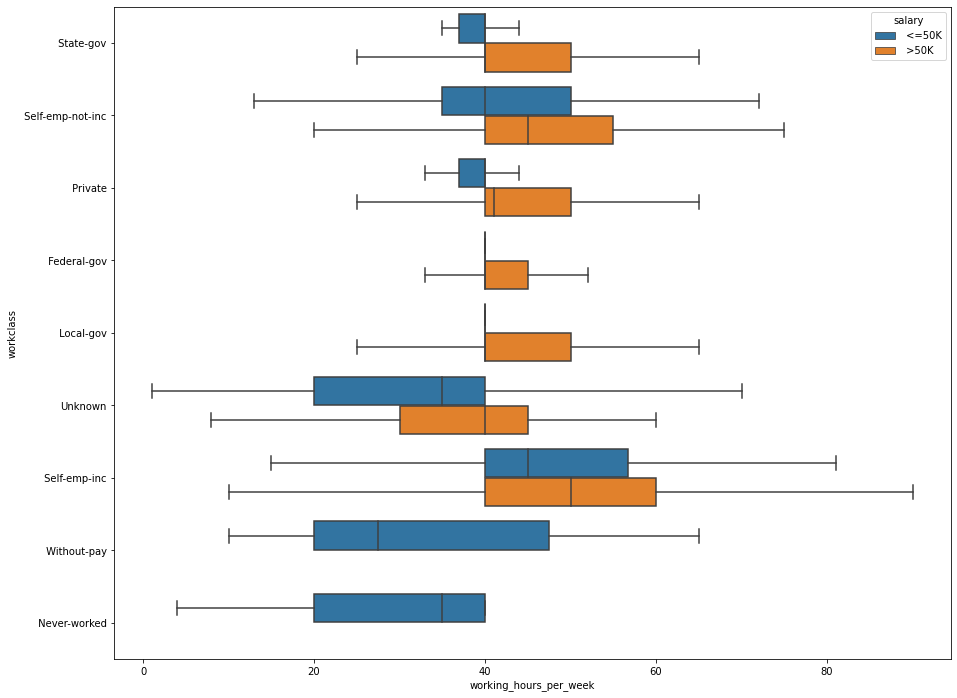

In [ ]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="workclass", x="working_hours_per_week", data=data, hue="salary", showfliers=False
)
plt.show()

* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.
* Without pay and never worked will have no income or less than 50K income.
* The number of working hours for many government employees is concentrated at 40 hrs a week, which makes sense as government employees generally have fixed working hours.

### Actions for data pre-processing:

* Many variables have outliers that need to be treated.
* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group.

## Data Preprocessing

* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group
* There are many outliers in the data which we will treat (perform capping of outliers)
  * All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

**Dropping capital_gain and capital_loss**

In [ ]:
data.drop(["capital_gain", "capital_loss"], axis=1, inplace=True)

### Outlier Detection

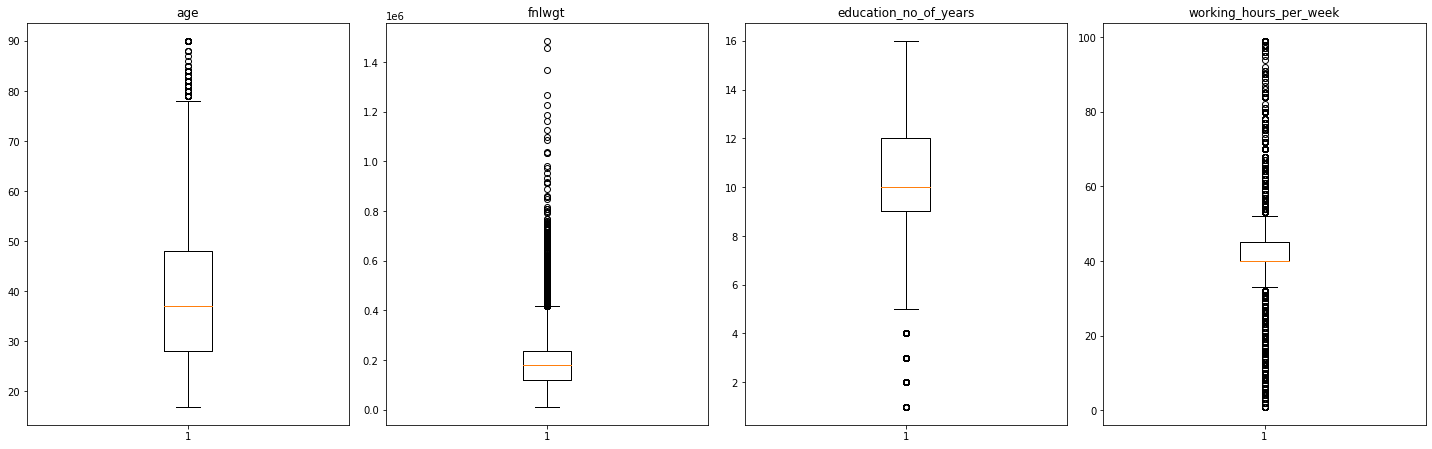

In [ ]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Age and fnlwgt have upper outliers. 
* education_no_years has lower outliers. 
* working_hours_per_week has both upper and lower outliers.

### Outlier Treatment

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)

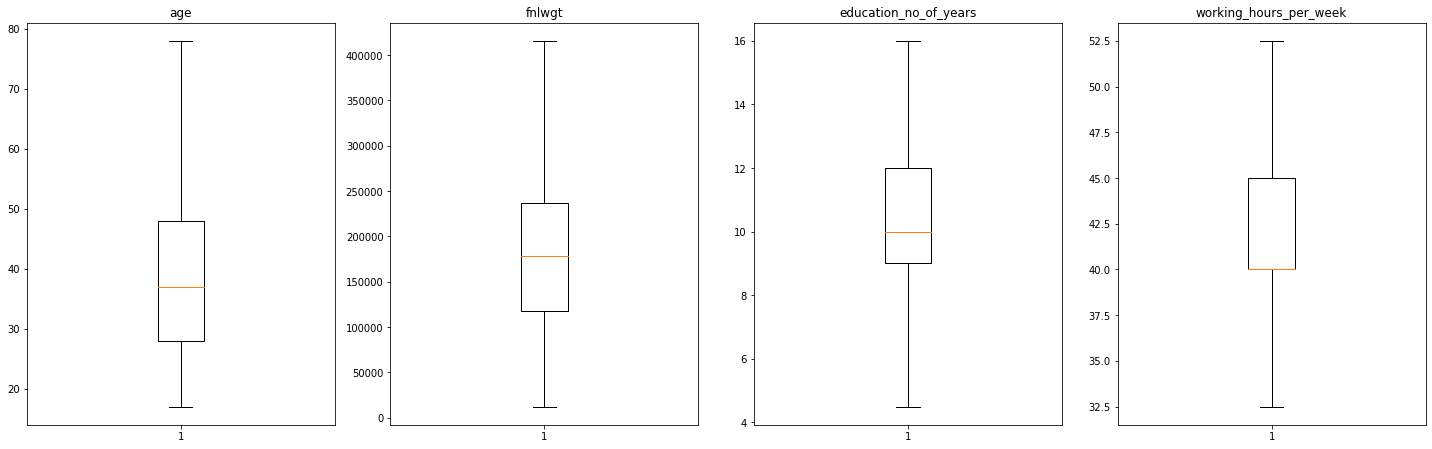

In [ ]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for Modeling

**Encoding >50K as 0 and <=50K as 1 as government wants to find underprivileged section of society.**

In [ ]:
data["salary"] = data["salary"].apply(lambda x: 1 if x == " <=50K" else 0)

**Creating training and test sets.**

In [ ]:
# specifying the independent  and dependent variables
X = data.drop(["salary"], axis=1)
Y = data["salary"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (22771, 53)
Shape of test set :  (9760, 53)
Percentage of classes in training set:
1    0.758026
0    0.241974
Name: salary, dtype: float64
Percentage of classes in test set:
1    0.761373
0    0.238627
Name: salary, dtype: float64


## Model Building - Logistic Regression

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.3678
Time:                        05:47:01   Log-Likelihood:                -7965.8
converged:                      False   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             9.5199   3.46e+05   2.75e-05      1.000   -6.77e+05    6.77e+05
age                              -0.0314      0.002    -17.126      0.000 

**Observations**

- Negative values of the coefficient show that the probability of a person having a salary less than 50K decreases with the increase of the corresponding attribute value.
 
- Positive values of the coefficient show that the probability of a person having a salary less than 50K increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

### Model Performance Evaluation

**Model can make wrong predictions as**:

1. Predicting a person has a salary <=50K but in reality the salary of the person is >50K.

2. Predicting a person doesn't have a salary <=50K but in reality the salary of the person is <=50k.

**Which case is more important?** 

* Both the cases are important as:

  * If we predict a person has a salary <=50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme and government might lose resources.

  * If we predict a person doesn't have a salary <=50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme constituting to opportunity loss.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

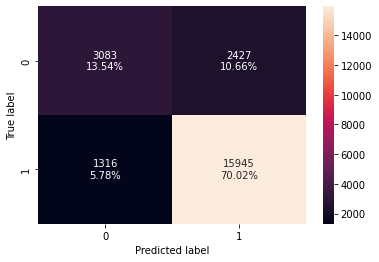

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835624,0.923759,0.867897,0.894957


**Observations**

- The f1_score of the model is 0.8949 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

### Detecting and Dealing with Multicollinearity

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                             0.000000
age                               1.531401
fnlwgt                            1.037491
education_no_of_years                  inf
working_hours_per_week            1.237162
workclass_ Local-gov              3.041470
workclass_ Never-worked                inf
workclass_ Private                7.717533
workclass_ Self-emp-inc           2.217152
workclass_ Self-emp-not-inc       3.487046
workclass_ State-gov              2.317984
workclass_ Without-pay            1.015562
workclass_Unknown                      inf
education_ 11th                        inf
education_ 12th                        inf
education_ 1st-4th                     inf
education_ 5th-6th                     inf
education_ 7th-8th                     inf
education_ 9th                         inf
education_ Assoc-acdm                  inf
education_ Assoc-voc                   inf
education_ Bachelors                   inf
education_ Doctorat

* `education_no_of_years`, `education`, and some categorical levels of `occupation`, `workclass`, `marital_status`, `native_country`, and `race` exhibit high multicollinearity

* We see that some variables have *inf* values for VIF
  * The *inf* values for VIF indicate perfect correlation between variables

* As we saw in our earlier analysis that wherever workclass has ? or unknown values occupation is also ? or unknown.
  * The high correlation between these variables has been highlighted in the VIF values as well

* We will drop `occupation_Unknown` as we get the same information from `workclass_Unknown`

**Removing `occupation_Unknown`**

In [ ]:
X_train1 = X_train.drop("occupation_Unknown", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                             0.000000
age                               1.531401
fnlwgt                            1.037491
education_no_of_years                  inf
working_hours_per_week            1.237162
workclass_ Local-gov              3.041470
workclass_ Never-worked           1.012785
workclass_ Private                7.717533
workclass_ Self-emp-inc           2.217152
workclass_ Self-emp-not-inc       3.487046
workclass_ State-gov              2.317984
workclass_ Without-pay            1.015562
workclass_Unknown                 3.039325
education_ 11th                        inf
education_ 12th                        inf
education_ 1st-4th                     inf
education_ 5th-6th                     inf
education_ 7th-8th                     inf
education_ 9th                         inf
education_ Assoc-acdm                  inf
education_ Assoc-voc                   inf
education_ Bachelors                   inf
education_ Doctorat

* `education_no_of_years` and `education` also capture similar information and hence, it is understandable that they have high VIF values

* We will be dropping `education_no_of_years` and `education` one at a time, building separate models, and checking their performances to see which variable has a significant impact on the model's performance

**Dropping `education_no_of_years`**

In [ ]:
X_train2 = X_train1.drop("education_no_of_years", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                            326.271888
age                                1.531401
fnlwgt                             1.037491
working_hours_per_week             1.237162
workclass_ Local-gov               3.041470
workclass_ Never-worked            1.012785
workclass_ Private                 7.717533
workclass_ Self-emp-inc            2.217152
workclass_ Self-emp-not-inc        3.487046
workclass_ State-gov               2.317984
workclass_ Without-pay             1.015562
workclass_Unknown                  3.039325
education_ 11th                    2.147415
education_ 12th                    1.422410
education_ 1st-4th                 1.188352
education_ 5th-6th                 1.338683
education_ 7th-8th                 1.655272
education_ 9th                     1.524978
education_ Assoc-acdm              2.105382
education_ Assoc-voc               2.374490
education_ Bachelors               5.939193
education_ Doctorate               1.5647

* Dropping education_no_of_years fixes the multicollinearity in education column.

In [ ]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835624,0.923759,0.867897,0.894957


* No significant change in the model performance.

**Dropping `education`**

In [ ]:
X_train3 = X_train1.drop(
    [
        "education_ 11th",
        "education_ 12th",
        "education_ 1st-4th",
        "education_ 5th-6th",
        "education_ 7th-8th",
        "education_ 9th",
        "education_ Assoc-acdm",
        "education_ Assoc-voc",
        "education_ Bachelors",
        "education_ Doctorate",
        "education_ HS-grad",
        "education_ Masters",
        "education_ Preschool",
        "education_ Prof-school",
        "education_ Some-college",
    ],
    axis=1,
)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

const                            313.516600
age                                1.481134
fnlwgt                             1.032554
education_no_of_years              1.530028
working_hours_per_week             1.228422
workclass_ Local-gov               3.024493
workclass_ Never-worked            1.011569
workclass_ Private                 7.709832
workclass_ Self-emp-inc            2.209649
workclass_ Self-emp-not-inc        3.478303
workclass_ State-gov               2.309586
workclass_ Without-pay             1.015246
workclass_Unknown                  3.023550
marital_status_married             1.964222
marital_status_not_married         1.704452
occupation_ Armed-Forces           1.008991
occupation_ Craft-repair           2.123864
occupation_ Exec-managerial        2.000903
occupation_ Farming-fishing        1.393182
occupation_ Handlers-cleaners      1.431322
occupation_ Machine-op-inspct      1.563909
occupation_ Other-service          1.7362

In [ ]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg3, X_train3, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835273,0.922658,0.86828,0.894644


* No significant change in the model performance.

**Observations:**
1. Dropping education_no_of_years and education doesn't have a significant impact on the model performance.
2. We can choose any model to proceed to the next steps.
3. Here, we will go with the lg2 model - where we dropped education_no_of_years as the education column captures more specific information.
4. Some of the categorical levels of a variable have VIF>5 which can simply be ignored.

**Let's check the summary of the model without `education_no_of_years`.**

In [ ]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.3678
Time:                        05:47:22   Log-Likelihood:                -7965.8
converged:                      False   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             8.3433      0.405     20.584      0.000       7.549       9.138
age                              -0.0314      0.002    -17.126      0.000 

### Removing high p-value variables

* In the case of `race`, all the attributes have a high p-value, which means it is not significant. Therefore, we can drop the variable as a whole, i.e., we can drop all the dummy variables for the `race` variable
* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

**Dropping `race`**

In [ ]:
X_train4 = X_train2.drop(
    ["race_ Asian-Pac-Islander", "race_ Black", "race_ Other", "race_ White"], axis=1
)

logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit()

print(lg4.summary())

         Current function value: 0.350046
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22724
Method:                           MLE   Df Model:                           46
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.3674
Time:                        05:47:23   Log-Likelihood:                -7970.9
converged:                      False   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             8.1384      0.303     26.860      0.000       7.545       8.732
age     

**Using a loop to drop variables with high p-values**

In [ ]:
# initial list of columns
cols = X_train4.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train4[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'age', 'fnlwgt', 'working_hours_per_week', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_Unknown', 'education_ 1st-4th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Prof-school', 'education_ Some-college', 'marital_status_married', 'marital_status_not_married', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'native_country_europe', 'native_country_north_america']


In [ ]:
X_train5 = X_train4[selected_features]

In [ ]:
logit5 = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit5.fit(disp=False)

print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22737
Method:                           MLE   Df Model:                           33
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.3661
Time:                        05:47:27   Log-Likelihood:                -7986.7
converged:                       True   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             8.3897      0.246     34.055      0.000       7.907       8.873
age                              -0.0317      0.002    -17.369      0.000 

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train5* as the final ones and *lg5* as final model.**

### Coefficient Interpretations

* Coefficient of some levels of education, workclass, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary. 

* Coefficient of age, fnlwgt, marital_status, working_hours_per_week, some levels of education, workclass, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [ ]:
# converting coefficients to odds
odds = np.exp(lg5.params)

# finding the percentage change
perc_change_odds = (np.exp(lg5.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train5.columns).T

,const,age,fnlwgt,working_hours_per_week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_Unknown,education_ 1st-4th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Prof-school,education_ Some-college,marital_status_married,marital_status_not_married,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Tech-support,occupation_ Transport-moving,native_country_europe,native_country_north_america
Odds,4401.616600,0.968840,0.999999,0.935609,1.850169,1.417533,2.195339,2.186965,3.180100,5.013024,1.860993,1.842129,0.278117,0.256811,0.135094,0.052362,0.459186,0.089978,0.042656,0.343072,0.074770,0.675395,0.529029,3.139870,2.397586,1.594469,2.857585,11.952550,0.670536,0.625018,0.571368,1.249490,0.654468,0.632667
Change_odd%,440061.659984,-3.116036,-0.000059,-6.439132,85.016879,41.753283,119.533942,118.696465,218.010034,401.302351,86.099345,84.212893,-72.188253,-74.318933,-86.490604,-94.763761,-54.081398,-91.002175,-95.734434,-65.692808,-92.523047,-32.460545,-47.097057,213.986997,139.758571,59.446943,185.758462,1095.255043,-32.946444,-37.498198,-42.863221,24.948968,-34.553205,-36.733282


**Coefficient interpretations**

* `age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a person having salary <=50k by ~0.97 times or a ~3.11% decrease in odds of having salary <=50K.
* `working_hours_per_week`: Holding all other features constant a 1 unit change in the working_hours_per_week will decrease the odds of a person having salary <=50k by ~0.93 times or a decrease of ~6.4% decrease in odds of having salary <=50K.
* The odds of a person whose marital status is married having a salary <=50K is ~0.075 less than the person who was never married or ~92.5% fewer odds of having salary <=50K. Similarly, The odds of a person whose marital status is not_married having a salary <=50K is ~0.67 times less than the person who was never married or ~32.5% less odds of having a salary <=50K than the person who was never married. [keeping Never_married category as a reference].
* The odds of a person who is HS-grad having salary <=50K is ~0.46 times less than the person who has done education 1st-9th, 11th or Preschool or ~54.1% fewer odds of having salary <=50K. Similarly, The odds of a person who has a Doctorate having a salary <=50K is 0.05 times less than the person who has done education 1st-9th or Preschool or ~95.00% less odds of having a salary <=50K. [keeping  education_ 1st-4th,education_ 5th-6th, education_ 7th-8th, education_ 9th, education_ 11th, education_ Preschool category as a reference].

**Interpretation for other attributes can be done similarly.**

### Checking performance of the new model

**Training set performance**

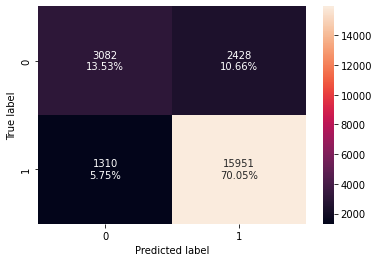

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg5, X_train5, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg5, X_train5, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835844,0.924106,0.867893,0.895118


**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [ ]:
X_test5 = X_test[list(X_train5.columns)]

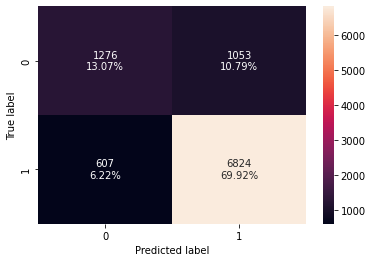

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg5, X_test5, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg5, X_test5, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.829918,0.918315,0.86632,0.89156


- The model is giving a good f1_score of 0.895 and 0.892 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

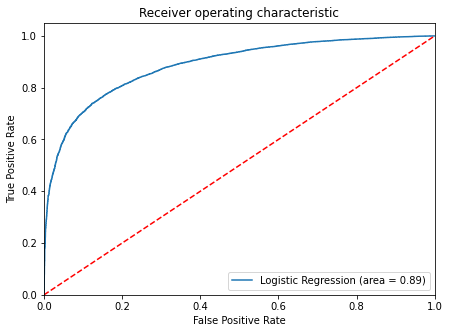

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg5.predict(X_train5))
fpr, tpr, thresholds = roc_curve(y_train, lg5.predict(X_train5))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg5.predict(X_train5))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.7586123976512383


**Checking model performance on training set**

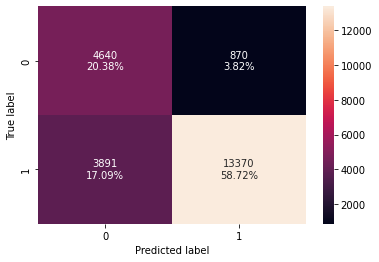

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg5, X_train5, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg5, X_train5, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.790918,0.774579,0.938904,0.848862


* Precision of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

**Checking model performance on test set**

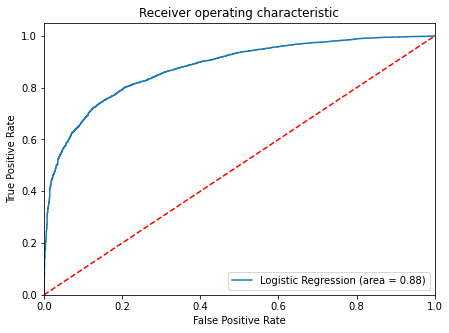

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg5.predict(X_test5))
fpr, tpr, thresholds = roc_curve(y_test, lg5.predict(X_test5))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

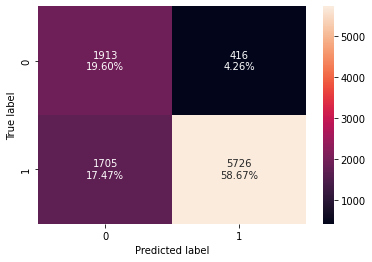

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg5, X_test5, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg5, X_test5, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.782684,0.770556,0.93227,0.843734


### Precision-Recall Curve

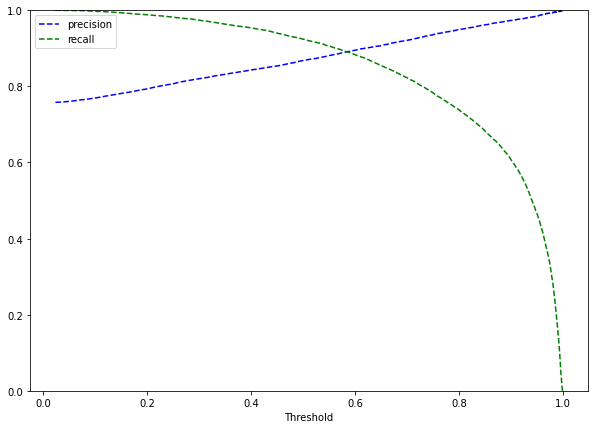

In [ ]:
y_scores = lg5.predict(X_train5)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.58, we get balanced recall and precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.58

**Checking model performance on training set**

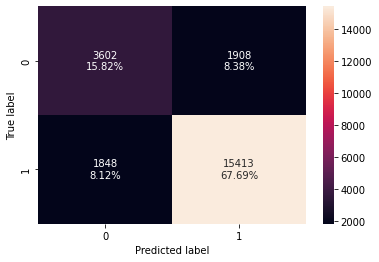

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg5, X_train5, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg5, X_train5, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835053,0.892938,0.889845,0.891389


* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

**Checking model performance on test set**

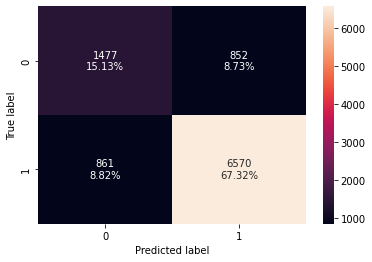

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg5, X_test5, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg5, X_test5, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.824488,0.884134,0.885206,0.88467


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.835844,0.790918,0.835053
Recall,0.924106,0.774579,0.892938
Precision,0.867893,0.938904,0.889845
F1,0.895118,0.848862,0.891389


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.829918,0.782684,0.824488
Recall,0.918315,0.770556,0.884134
Precision,0.866320,0.932270,0.885206
F1,0.891560,0.843734,0.884670


- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a default threshold (0.5) is giving the best F1 score. Therefore it can be selected as the final model


## Conclusions and Recommendations

* We have been able to build a predictive model that can be used by the government to find the citizens having less than 50K salary with an f1_score of 0.89 on the training set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and test set.

* Coefficient of some levels of education, workclass, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary. 

* Coefficient of age,fnlwgt,marital_status, working_hours_per_week,some levels of education, workclass, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

- The government should promote education among citizens, they should make policies to make education accessible to all, as we say in our analysis that people who have higher education are more likely to have a salary above 50,000 Dollars. 
- Working hours is one of the significant predictors of salary, The government should implement laws to ensure that people are paid fairly for their work and are not overworked for the increase in salaries. This would improve work-life balance.
- People who invest more are more likely to have a salary above 50k, government should initiate investment schemes and facilitate ease of investment so that people can plan and invest in resources.
- As we saw in our analysis that Asian-Pac-Islander and White people are paid more than other races, there should be reforms to ensure that the salary criterion of employees is independent of their race.
- Reforms should be made for private-sector employees so that they are paid fairly for their work.
- Policy formulated by the government should be considerate of equal pay and counter the pay gap that exists in society.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### Observations on fnlwgt

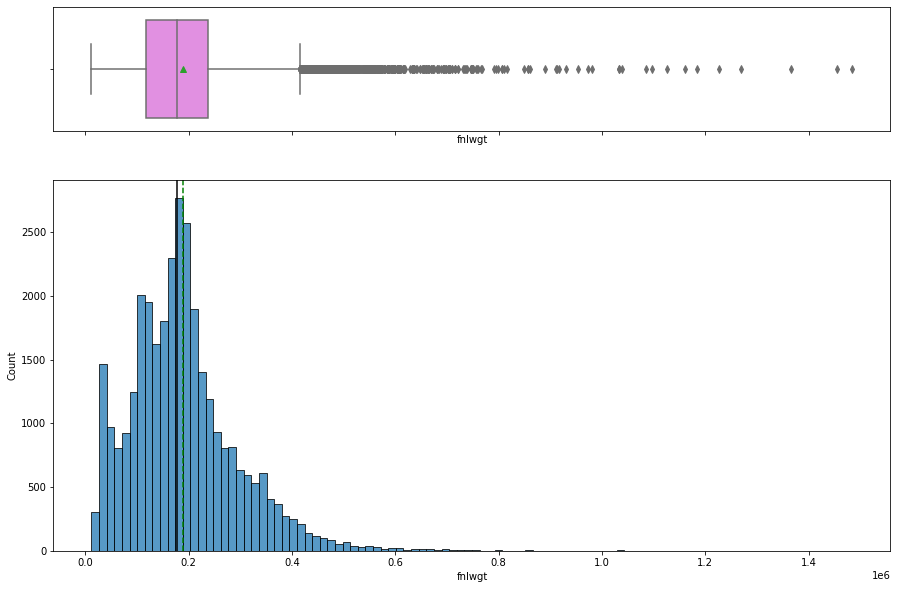

In [ ]:
histogram_boxplot(df, "fnlwgt", bins=100)

* fnlwght is right-skewed. It has lots of outliers on the right side which we can cap.

#### Observations on hours_per_week

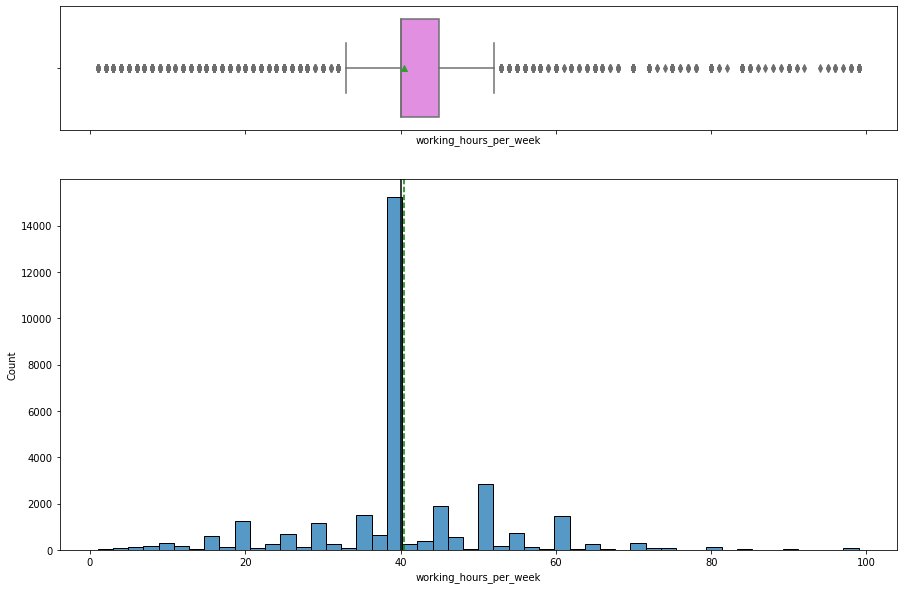

In [ ]:
histogram_boxplot(df, "working_hours_per_week", bins=50)

* Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week.
* Some of the observations are clear outliers like working  1 hour a week which needs to be treated.

#### Observations on workclass

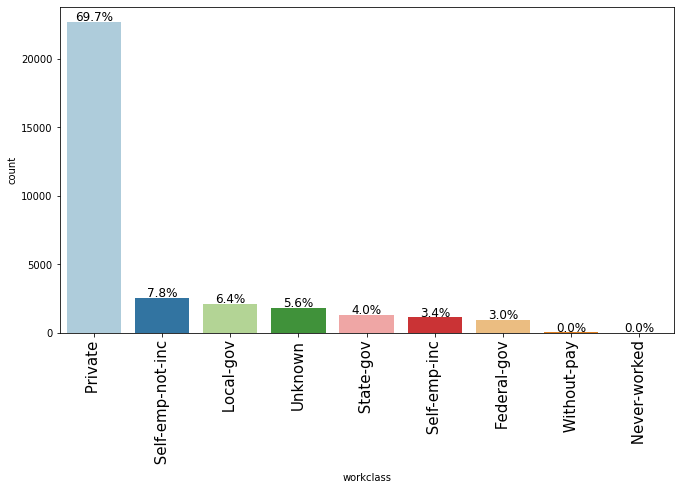

In [ ]:
labeled_barplot(df, "workclass", perc=True)

* ~70% of the observations are from the Private sector working class.
* As expected from the number of hours per week.

#### Observations on marital_status

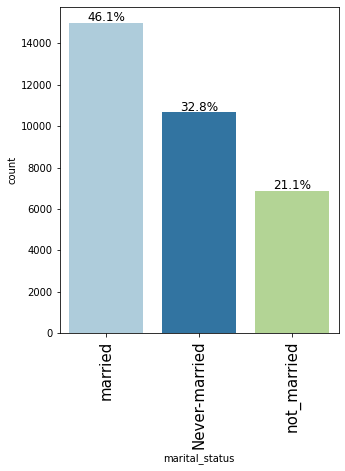

In [ ]:
labeled_barplot(df, "marital_status", perc=True)

* 46.1% of the observations in the dataset are married followed by 32.8% of the people who never married.

#### Observations on native_country

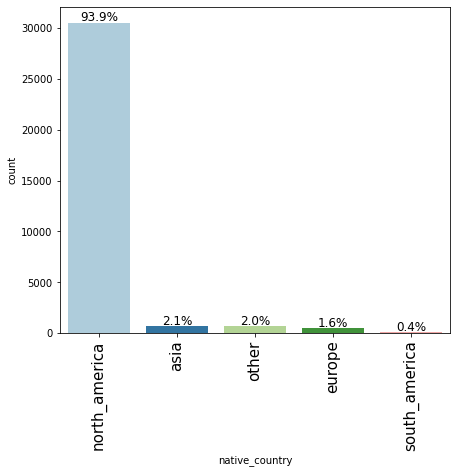

In [ ]:
labeled_barplot(df, "native_country", perc=True)

* 94% of the people are native to north_america followed by 2.1% Asians.

#### Observations on salary

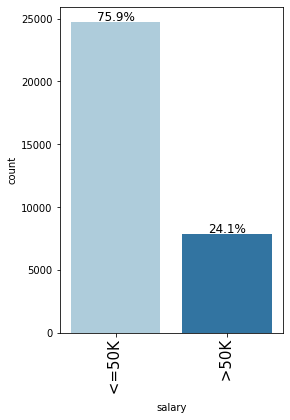

In [ ]:
labeled_barplot(df, "salary", perc=True)

* ~24% of the observations have a salary above 50K and while ~76% have a salary below 50K

### Bivariate analysis

#### Correlation Check

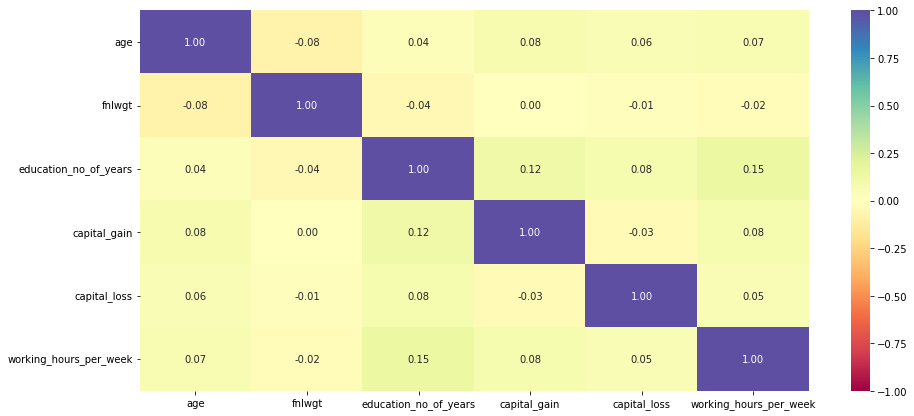

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no significant correlation between the columns.

#### salary vs sex

salary    <=50K   >50K    All
sex                          
All       24692   7839  32531
 Male     15113   6660  21773
 Female    9579   1179  10758
------------------------------------------------------------------------------------------------------------------------


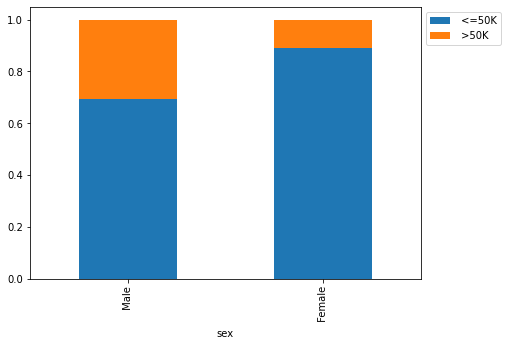

In [ ]:
stacked_barplot(df, "sex", "salary")

* ~30% of the males have salary >50K whereas only ~10% of the females have salary >50K.
* This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.

#### salary vs education

salary          <=50K   >50K    All
education                          
All             24692   7839  32531
 Bachelors       3132   2221   5353
 HS-grad         8816   1674  10490
 Some-college    5894   1386   7280
 Masters          763    959   1722
 Prof-school      153    423    576
 Assoc-voc       1021    361   1382
 Doctorate        107    306    413
 Assoc-acdm       802    265   1067
 10th             871     62    933
 11th            1115     60   1175
 7th-8th          605     40    645
 12th             400     33    433
 9th              487     27    514
 5th-6th          316     16    332
 1st-4th          160      6    166
 Preschool         50      0     50
------------------------------------------------------------------------------------------------------------------------


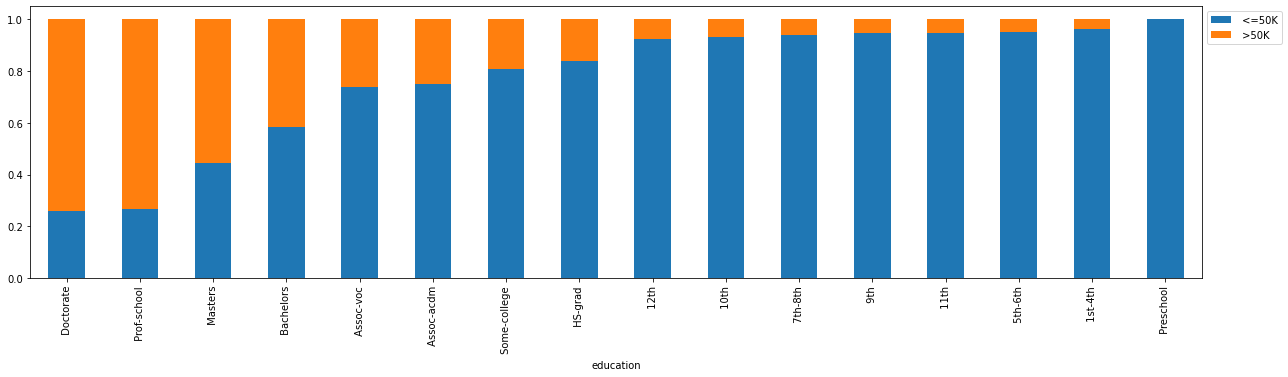

In [ ]:
stacked_barplot(df, "education", "salary")

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

#### salary vs occupation

salary               <=50K   >50K    All
occupation                              
All                  24692   7839  32531
 Exec-managerial      2097   1968   4065
 Prof-specialty       2278   1858   4136
 Sales                2666    983   3649
 Craft-repair         3164    929   4093
 Adm-clerical         3259    507   3766
 Transport-moving     1277    320   1597
 Tech-support          644    283    927
 Machine-op-inspct    1750    249   1999
 Protective-serv       438    211    649
Unknown               1652    191   1843
 Other-service        3153    137   3290
 Farming-fishing       877    115    992
 Handlers-cleaners    1283     86   1369
 Armed-Forces            8      1      9
 Priv-house-serv       146      1    147
------------------------------------------------------------------------------------------------------------------------


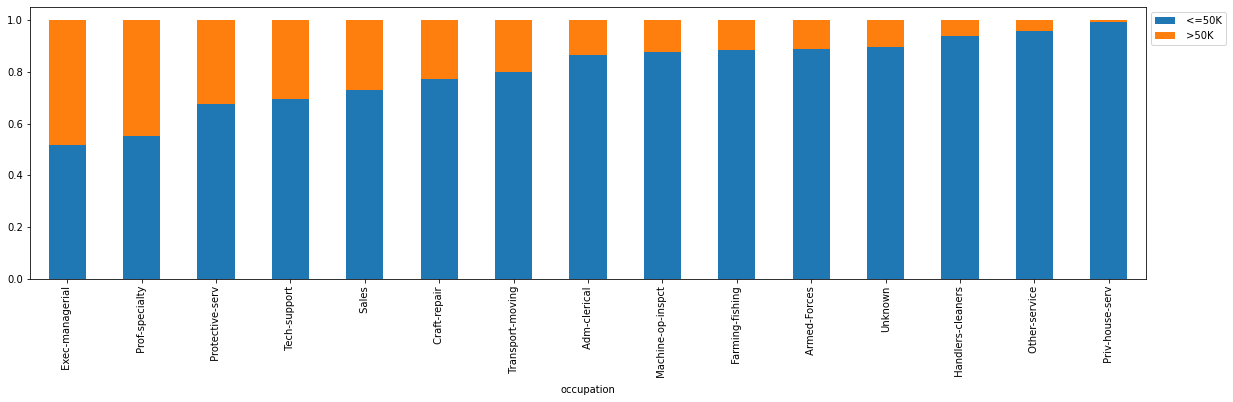

In [ ]:
stacked_barplot(df, "occupation", "salary")

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

#### salary vs race

salary                <=50K   >50K    All
race                                     
All                   24692   7839  32531
 White                20674   7115  27789
 Black                 2735    387   3122
 Asian-Pac-Islander     762    276   1038
 Amer-Indian-Eskimo     275     36    311
 Other                  246     25    271
------------------------------------------------------------------------------------------------------------------------


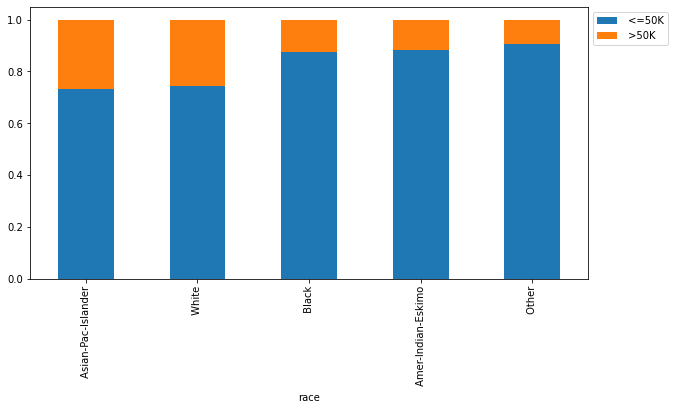

In [ ]:
stacked_barplot(df, "race", "salary")

* 25% of the White and Asia-Pacific people have a salary more than 50K salary as compared to people from other race.

#### salary vs workclass

salary              <=50K   >50K    All
workclass                              
All                 24692   7839  32531
 Private            17706   4961  22667
 Self-emp-not-inc    1816    724   2540
 Self-emp-inc         494    622   1116
 Local-gov           1476    617   2093
 Federal-gov          589    371    960
 State-gov            945    353   1298
Unknown              1645    191   1836
 Never-worked           7      0      7
 Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


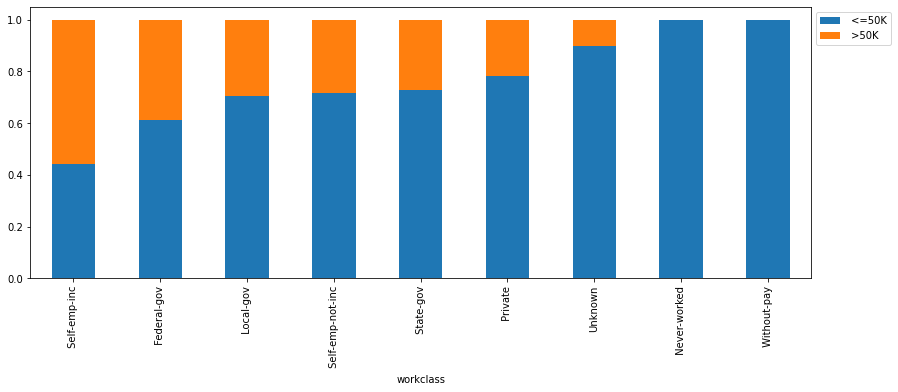

In [ ]:
stacked_barplot(df, "workclass", "salary")

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* ~20% of the people working in the private sector earn more than 50K.

#### salary vs marital_status

salary           <=50K   >50K    All
marital_status                      
All              24692   7839  32531
married           8293   6700  14993
not_married       6229    648   6877
Never-married    10170    491  10661
------------------------------------------------------------------------------------------------------------------------


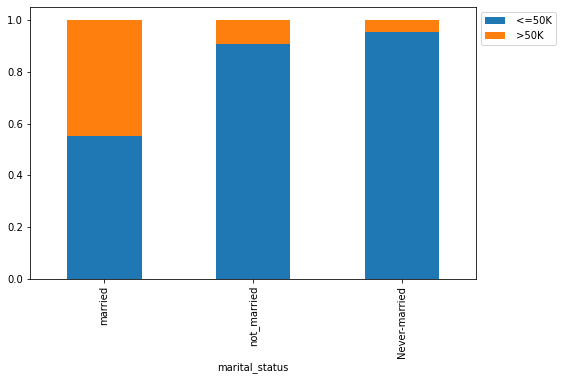

In [ ]:
stacked_barplot(df, "marital_status", "salary")

* Married people have a higher likelihood of getting a salary above 50K compared to Never Married and Not married people.

#### salary vs age

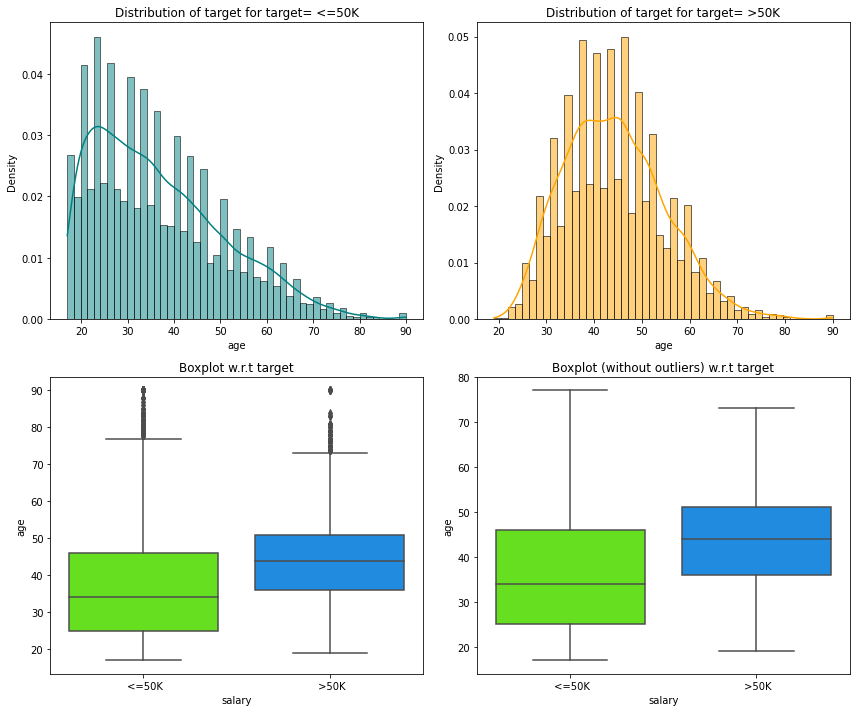

In [ ]:
distribution_plot_wrt_target(df, "age", "salary")

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

#### salary vs working_hours_per_week

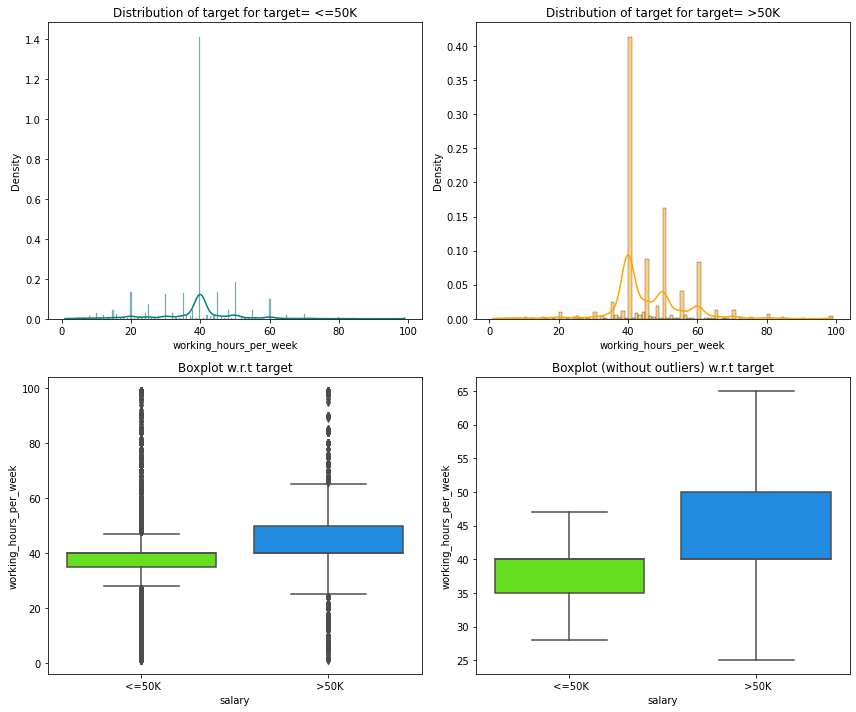

In [ ]:
distribution_plot_wrt_target(df, "working_hours_per_week", "salary")

* Majority of people having above 50K salary work around 40 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

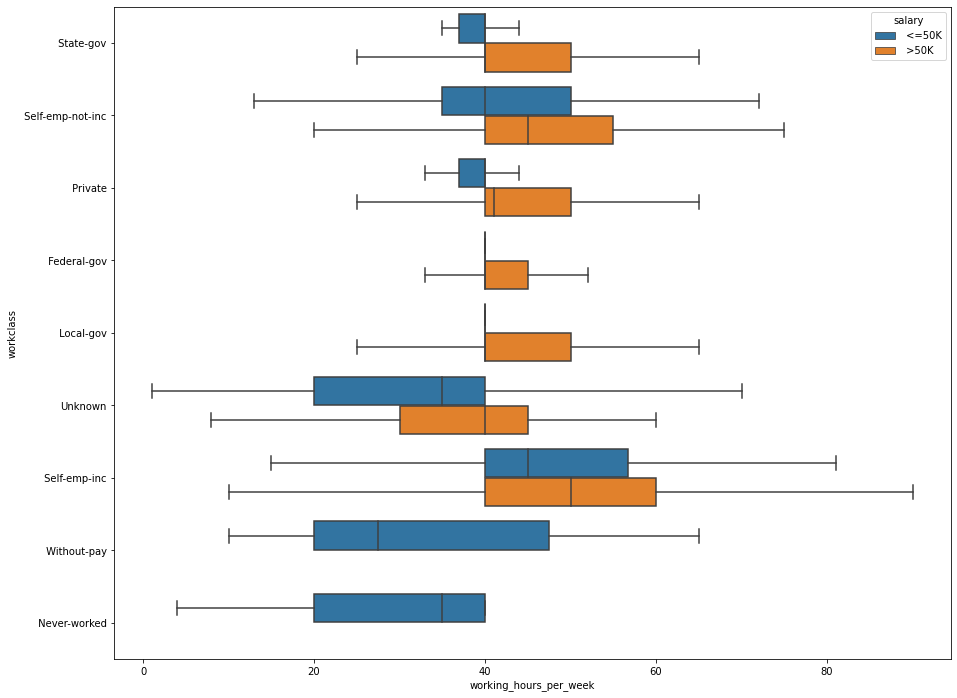

In [ ]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="workclass", x="working_hours_per_week", data=df, hue="salary", showfliers=False
)
plt.show()

* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.
* Without pay and never worked will have no income or less than 50K income.
* The number of working hours for many government employees is concentrated at 40 hrs a week, which makes sense as government employees generally have fixed working hours.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.